# UE709 Network and Algorithms

## Practical Work 3 - Asif Mammadov

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
data = pd.read_csv('airports.csv')
# Fill the values that are NaN
data['AirTime'] = data['AirTime'].fillna(40)

In [2]:
G = nx.from_pandas_edgelist(data, source='Origin', target='Dest', edge_attr=True, create_using=nx.DiGraph)

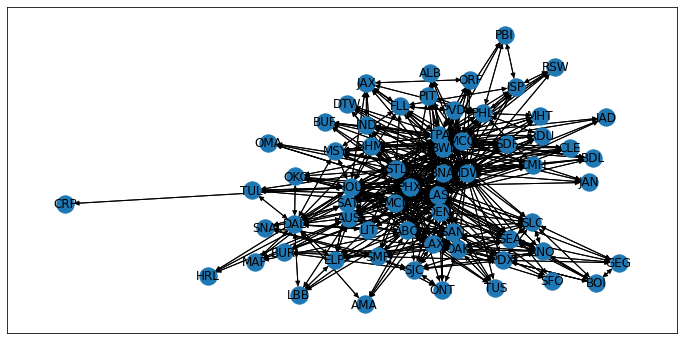

In [3]:
plt.figure(figsize=(12, 6))
nx.draw_networkx(G, with_labels=True)
plt.show()

In [4]:
def bellman_ford(G, origin, dest, attr):
    distance = {}
    parent = {}
    # Initialization
    for node in G.nodes():
        distance[node] = np.inf
        parent[node] = None
    distance[origin] = 0
    edges = list(nx.get_edge_attributes(G, attr).keys())
    weight = nx.get_edge_attributes(G, attr)
    # Assign weights
    for i in range(len(distance)):
        for edge in edges:
            if distance[edge[0]] + weight[edge] < distance[edge[1]]:
                distance[edge[1]] = distance[edge[0]] + weight[edge]
                parent[edge[1]] = edge[0]
    # Implement negative cycle
    for edge in edges:
        if distance[edge[0]] + weight[edge] < distance[edge[1]]:
            raise Exception("Graph contains a negative-weight cycle")
    # Return path
    current = dest
    path = []
    while current:
        path.insert(0, current)
        current = parent[current]
    return path

In [5]:
def get_min_key(distance, unvisited):
    min_val = np.inf
    min_key = unvisited[0]
    for key, value in distance.items():
        if value <= min_val and key in unvisited:
            min_val = value
            min_key = key
    return min_key

def djikstra(G, origin, dest, attr):
    unvisited = list(G.nodes())
    distance = {}
    parent = {}
    weight = nx.get_edge_attributes(G, attr)
    for node in G.nodes():
        distance[node] = np.inf
        parent[node] = None
    distance[origin] = 0

    while len(unvisited) != 0:
        current_node = get_min_key(distance, unvisited)
        unvisited.remove(current_node)
        for neighbor in G.neighbors(current_node):
            new_distance = distance[current_node] + weight[(current_node, neighbor)]
            if(distance[neighbor] > new_distance):
                distance[neighbor] = new_distance
                parent[neighbor] = current_node
    # Return path
    current = dest
    path = []
    while current:
        path.insert(0, current)
        current = parent[current]

    return path



In [6]:
print("With respect to distance")
print("\nBellman Ford")
start_time =  time.time()
print(bellman_ford(G, 'CRP', 'BOI', 'Distance'))
print("Execution time:", time.time() - start_time)

print("\nDjikstra")
start_time =  time.time()
print(djikstra(G, 'CRP', 'BOI', 'Distance'))
print("Execution :", time.time() - start_time)


With respect to distance

Bellman Ford
['CRP', 'HOU', 'ABQ', 'SLC', 'BOI']
Execution time: 0.03416728973388672

Djikstra
['CRP', 'HOU', 'ABQ', 'SLC', 'BOI']
Execution : 0.0033342838287353516


In [7]:
print("With respect to air time")
print("\nBellman-Ford")
start_time =  time.time()
print(bellman_ford(G, 'CRP', 'BOI', 'AirTime'))
print("Execution time:", time.time() - start_time)

print("\nDjikstra")
start_time =  time.time()
print(djikstra(G, 'CRP', 'BOI', 'AirTime'))
print("Execution :", time.time() - start_time)


With respect to air time

Bellman-Ford
['CRP', 'HOU', 'DEN', 'SLC', 'BOI']
Execution time: 0.03170490264892578

Djikstra
['CRP', 'HOU', 'DEN', 'SLC', 'BOI']
Execution : 0.003370046615600586


As we can see in both cases the Djikstra algorithm outperforms the Bellman-Ford algorithm.